In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")
# Đọc dữ liệu đã làm sạch
df = pd.read_csv("cleaned_data_part_2_official.csv")
# Xem tổng quan
display(df.head())
df.info()


,Make,Car_Name,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm,Engine_Layout,Fuel_Type_Cleaned
0,FERRARI,Sf90 Stradale,3990.0,963.0,340.0,2.5,1100000.0,2,800.0,V-type,Hybrid
1,ROLLS ROYCE,Phantom,6749.0,563.0,250.0,5.3,460000.0,5,900.0,V-type,Petrol
2,FORD,Ka+,1200.0,77.5,165.0,10.5,13500.0,5,120.0,Inline,Petrol
3,MERCEDES,Gt 63 S,3982.0,630.0,250.0,3.2,161000.0,4,900.0,V-type,Petrol
4,AUDI,Audi R8 Gt,5204.0,602.0,320.0,3.6,253290.0,2,560.0,V-type,Petrol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1058 non-null   object 
 1   Car_Name                1058 non-null   object 
 2   CC_Capacity             1058 non-null   float64
 3   Horsepower              1058 non-null   float64
 4   Top_Speed_kmh           1058 non-null   float64
 5   Acceleration_0_100_sec  1058 non-null   float64
 6   Price_USD               1058 non-null   float64
 7   Seats                   1058 non-null   int64  
 8   Torque_Nm               1058 non-null   float64
 9   Engine_Layout           1058 non-null   object 
 10  Fuel_Type_Cleaned       1058 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 91.1+ KB


## 2. TỔNG QUAN DỮ LIỆU

In [5]:
# Phân loại biến
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(" Numeric columns:", list(num_cols))
print(" Categorical columns:", list(cat_cols))

# Thống kê cơ bản
df.describe().T

 Numeric columns: ['CC_Capacity', 'Horsepower', 'Top_Speed_kmh', 'Acceleration_0_100_sec', 'Price_USD', 'Seats', 'Torque_Nm']
 Categorical columns: ['Make', 'Car_Name', 'Engine_Layout', 'Fuel_Type_Cleaned']


,count,mean,std,min,25%,50%,75%,max
CC_Capacity,1058.0,2932.405482,1620.473900,360.0,1600.0,2480.0,3672.0,7993.0
Horsepower,1058.0,293.426418,200.027266,26.0,150.0,248.0,382.0,1850.0
Top_Speed_kmh,1058.0,219.757089,51.949821,80.0,180.0,210.0,250.0,500.0
Acceleration_0_100_sec,1058.0,7.666163,3.295567,2.2,5.5,7.3,9.5,35.0
Price_USD,1058.0,112574.049149,375488.230577,4000.0,27200.0,41292.5,69900.0,5000000.0
Seats,1058.0,4.845936,1.416181,1.0,4.0,5.0,5.0,8.0
Torque_Nm,1058.0,411.143544,231.845022,45.0,250.0,366.0,530.0,1600.0


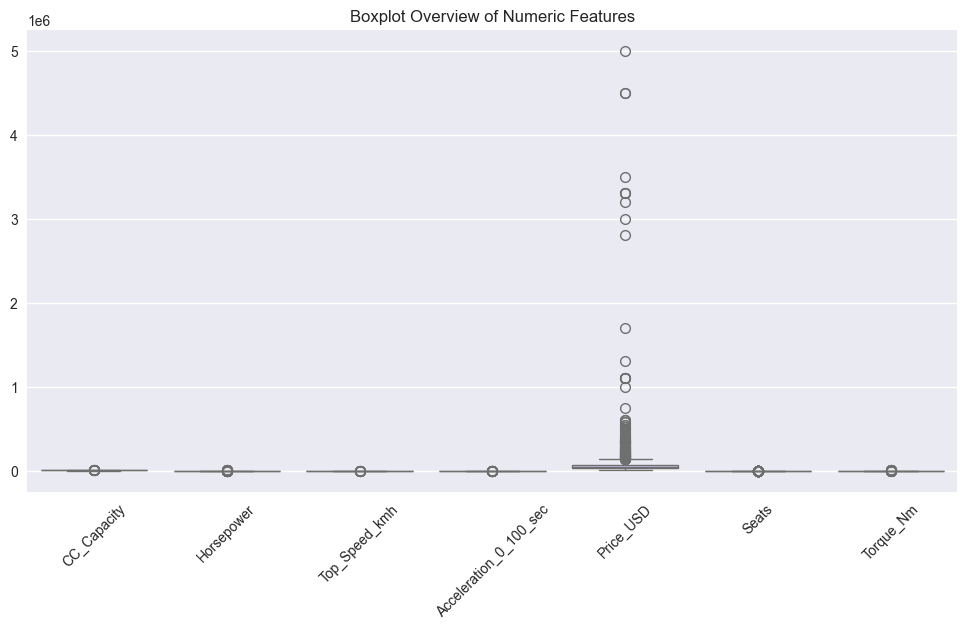

In [6]:
# Boxplot tổng quan để xem outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot Overview of Numeric Features")
plt.xticks(rotation=45)
plt.show()

## 3. UNIVARIATE ANALYSIS – PHÂN TÍCH TỪNG BIẾN

### 3.1 Numeric feature

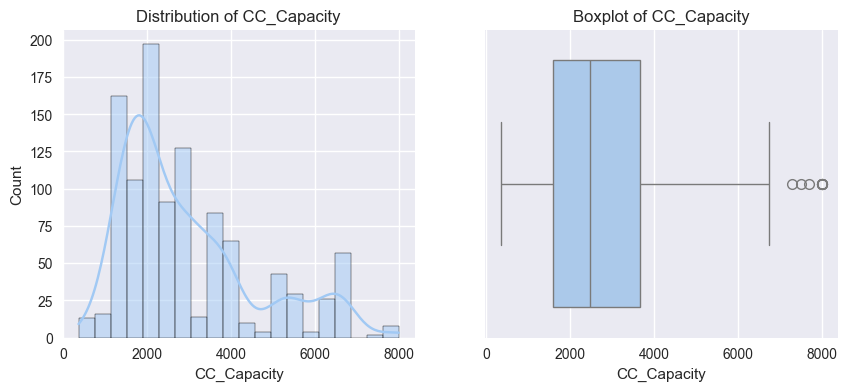

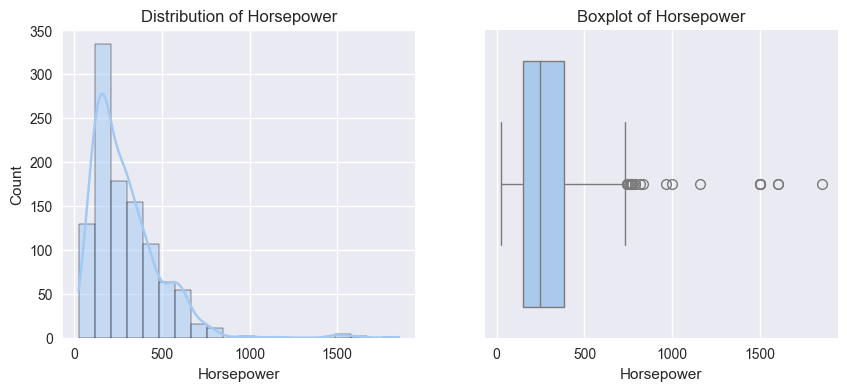

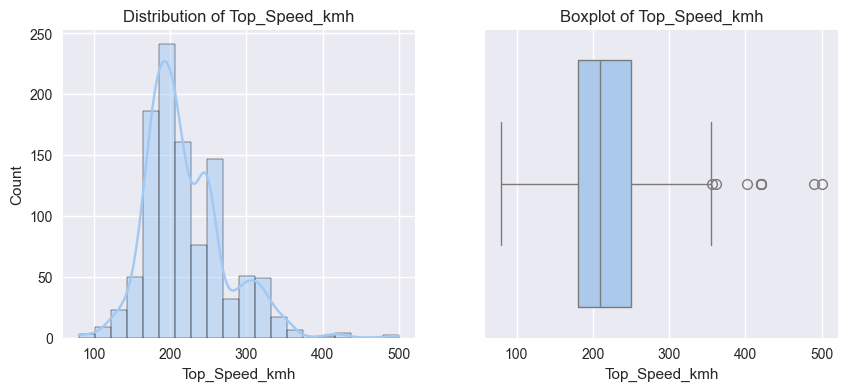

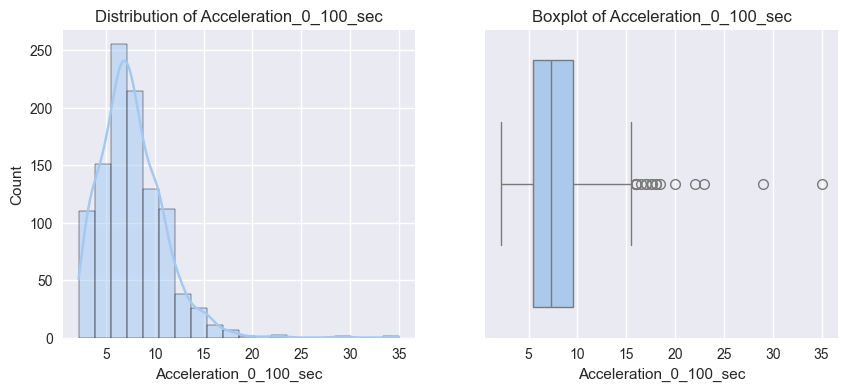

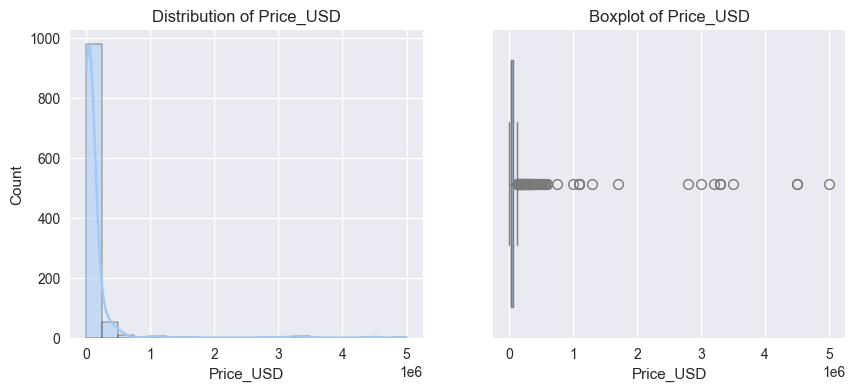

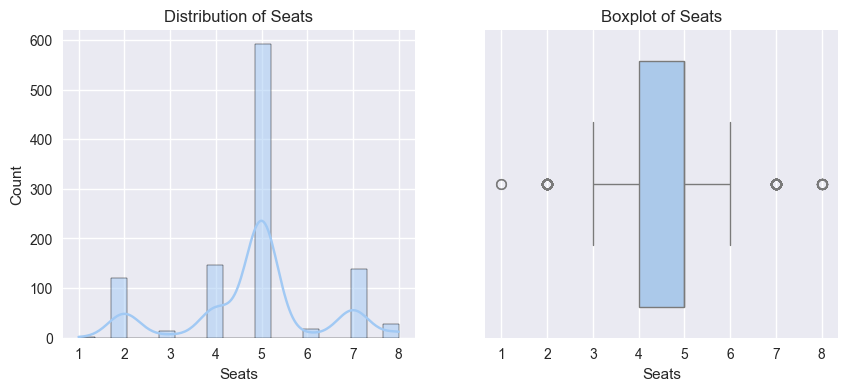

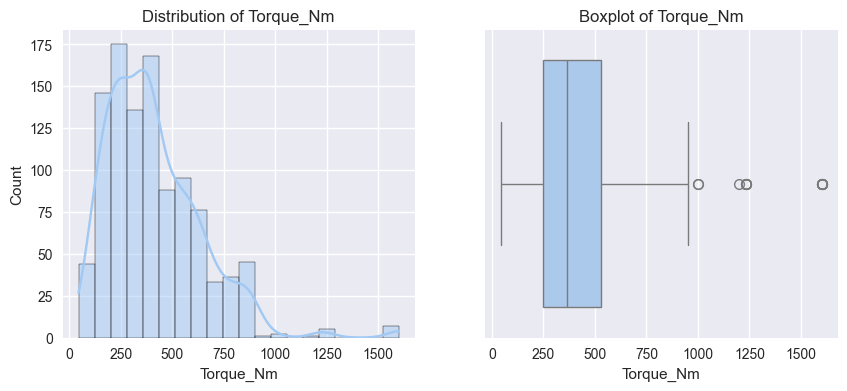

In [7]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 3.2 Categorical features

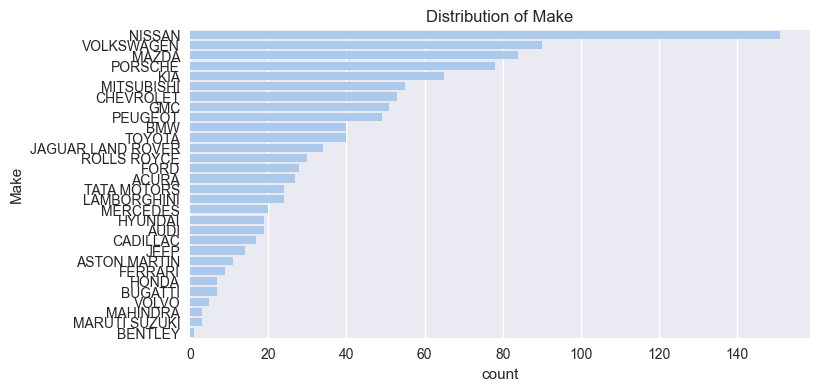

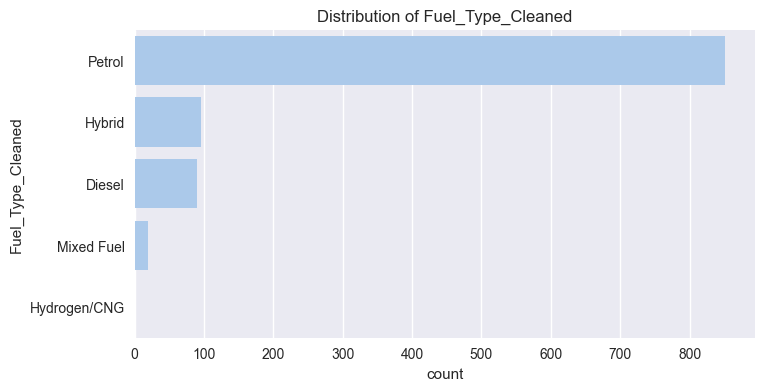

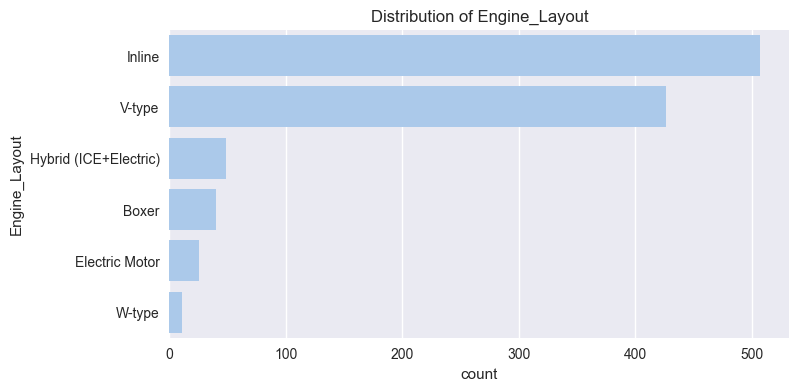

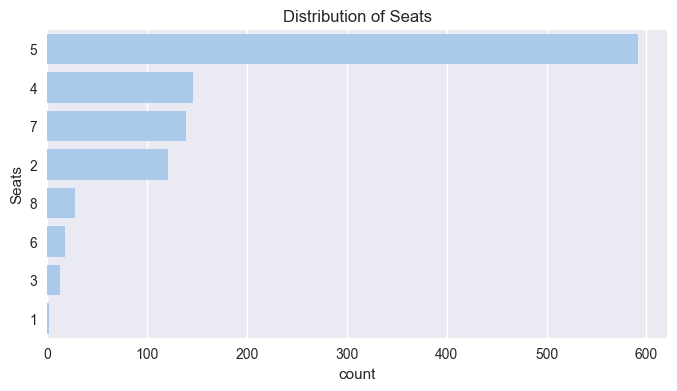

In [8]:
for col in ['Make', 'Fuel_Type_Cleaned', 'Engine_Layout', 'Seats']:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

## 4. BIVARIATE ANALYSIS – MỐI QUAN HỆ 2 BIẾN

### 4.1 Numeric vs Price

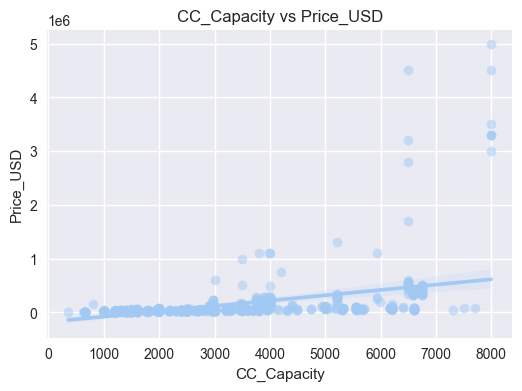

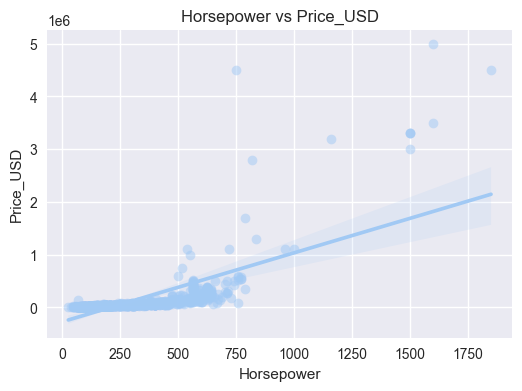

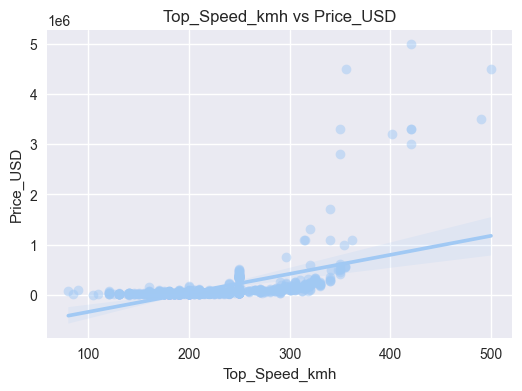

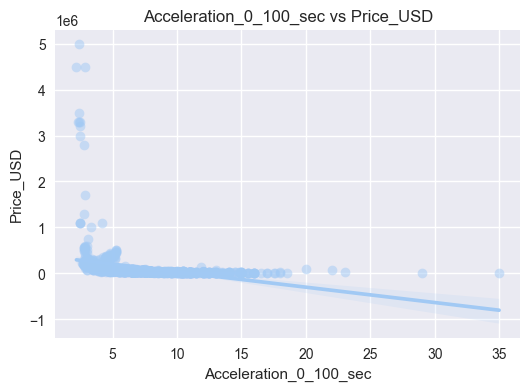

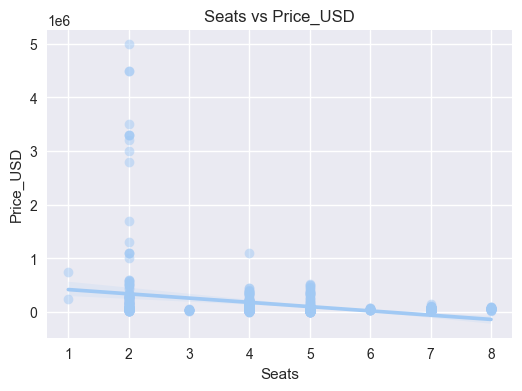

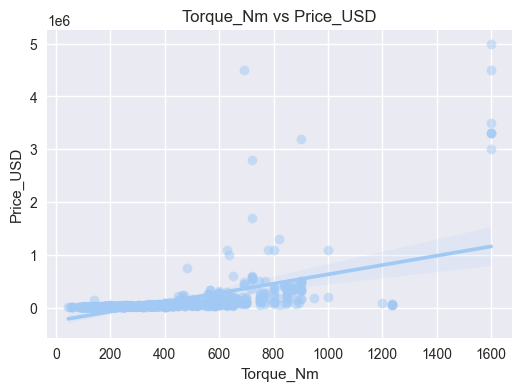

In [9]:
target = "Price_USD"
cols_to_check = [c for c in num_cols if c != target]

for col in cols_to_check:
    plt.figure(figsize=(6,4))
    sns.regplot(x=col, y=target, data=df, scatter_kws={'alpha':0.5})
    plt.title(f"{col} vs {target}")
    plt.show()

### 4.2 Categorical vs Price

In [10]:
import plotly.express as px
import pandas as pd

# Danh sách cột phân loại
categorical_cols = ['Fuel_Type_Cleaned', 'Engine_Layout', 'Seats']

for col in categorical_cols:
    avg_df = df.groupby(col, as_index=False)['Price_USD'].mean().sort_values('Price_USD', ascending=False)
    
    fig = px.bar(
        avg_df,
        x=col,
        y='Price_USD',
        text='Price_USD',
        color='Price_USD',
        color_continuous_scale='Blues',
        title=f" Giá trung bình theo {col}",
        template='plotly_white'
    )
    fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig.update_layout(
        xaxis_title=col,
        yaxis_title='Giá xe trung bình (USD)',
        title_x=0.5,
        height=500
    )
    fig.show()


### 4.3 Performance Index Analysis (Feature Engineering)


In [11]:
# Tạo đặc trưng mới: chỉ số hiệu suất giữa công suất và khả năng tăng tốc
df['Performance_Index'] = df['Horsepower'] / df['Acceleration_0_100_sec']

# Kiểm tra nhanh vài giá trị đầu
df[['Horsepower', 'Acceleration_0_100_sec', 'Performance_Index']].head()


,Horsepower,Acceleration_0_100_sec,Performance_Index
0,963.0,2.5,385.200000
1,563.0,5.3,106.226415
2,77.5,10.5,7.380952
3,630.0,3.2,196.875000
4,602.0,3.6,167.222222


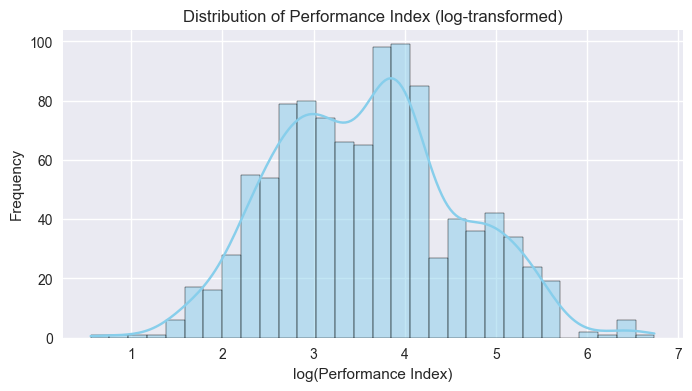

In [52]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['Performance_Index']), kde=True, bins=30, color='skyblue')
plt.title("Distribution of Performance Index (log-transformed)")
plt.xlabel("log(Performance Index)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(df["Performance_Index"]), y=np.log1p(df["Price_USD"]))
plt.title("Hiệu suất vs Giá xe (thang log-log)")
plt.xlabel("log(Performance Index)")
plt.ylabel("log(Giá USD)")
plt.show()



## 5. MULTIVARIATE ANALYSIS – PHÂN TÍCH ĐA BIẾN

### 5.1 Ma trận tương quan

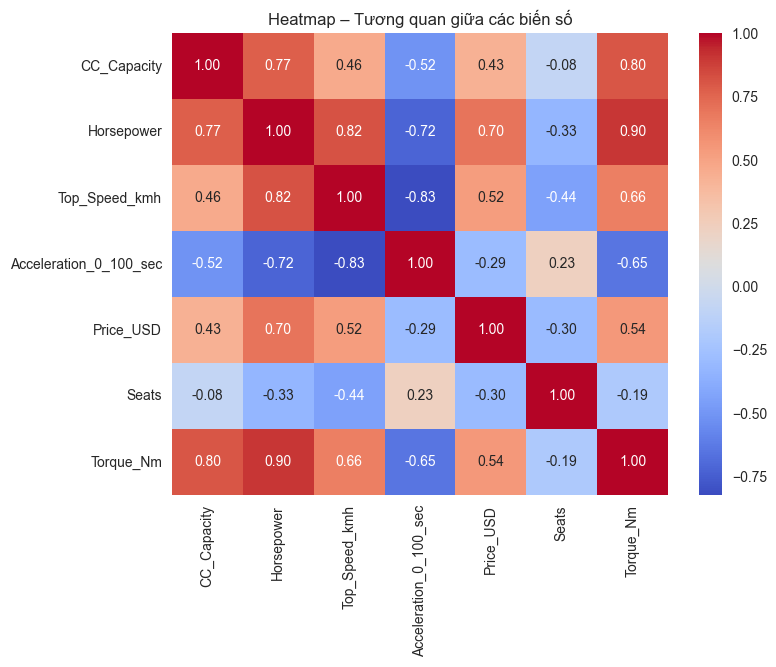

In [13]:
plt.figure(figsize=(8,6))

# chỉ lấy cột numeric
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap – Tương quan giữa các biến số")
plt.show()



### 5.2 Pairplot để xem pattern giữa các biến

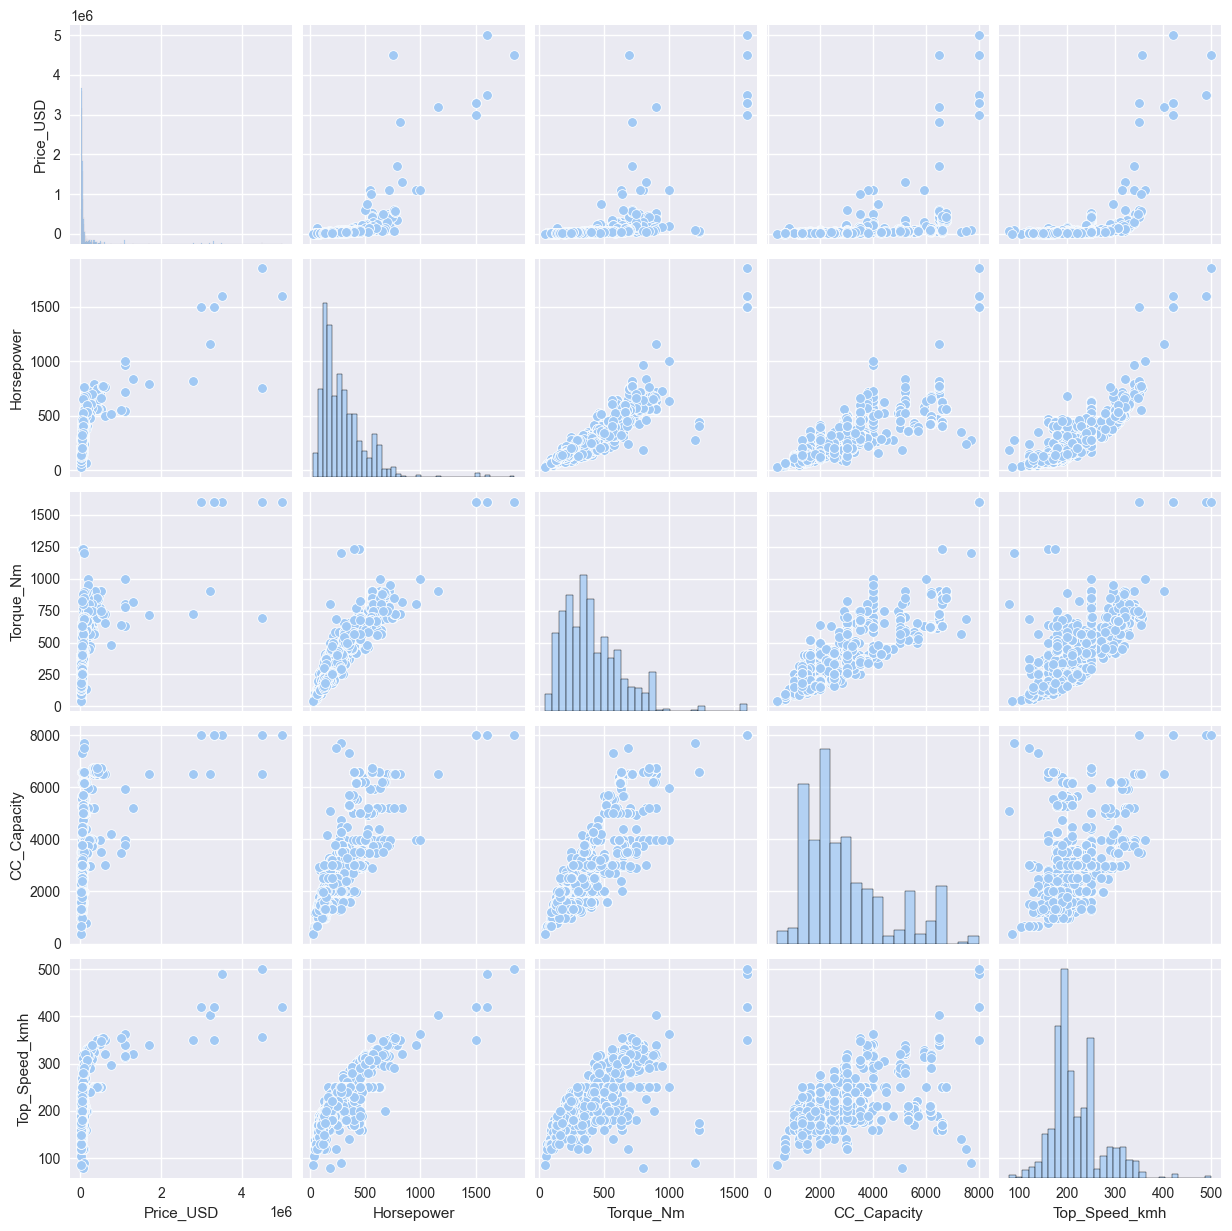

In [14]:
sns.pairplot(df[['Price_USD','Horsepower','Torque_Nm',
                 'CC_Capacity','Top_Speed_kmh']])
plt.show()

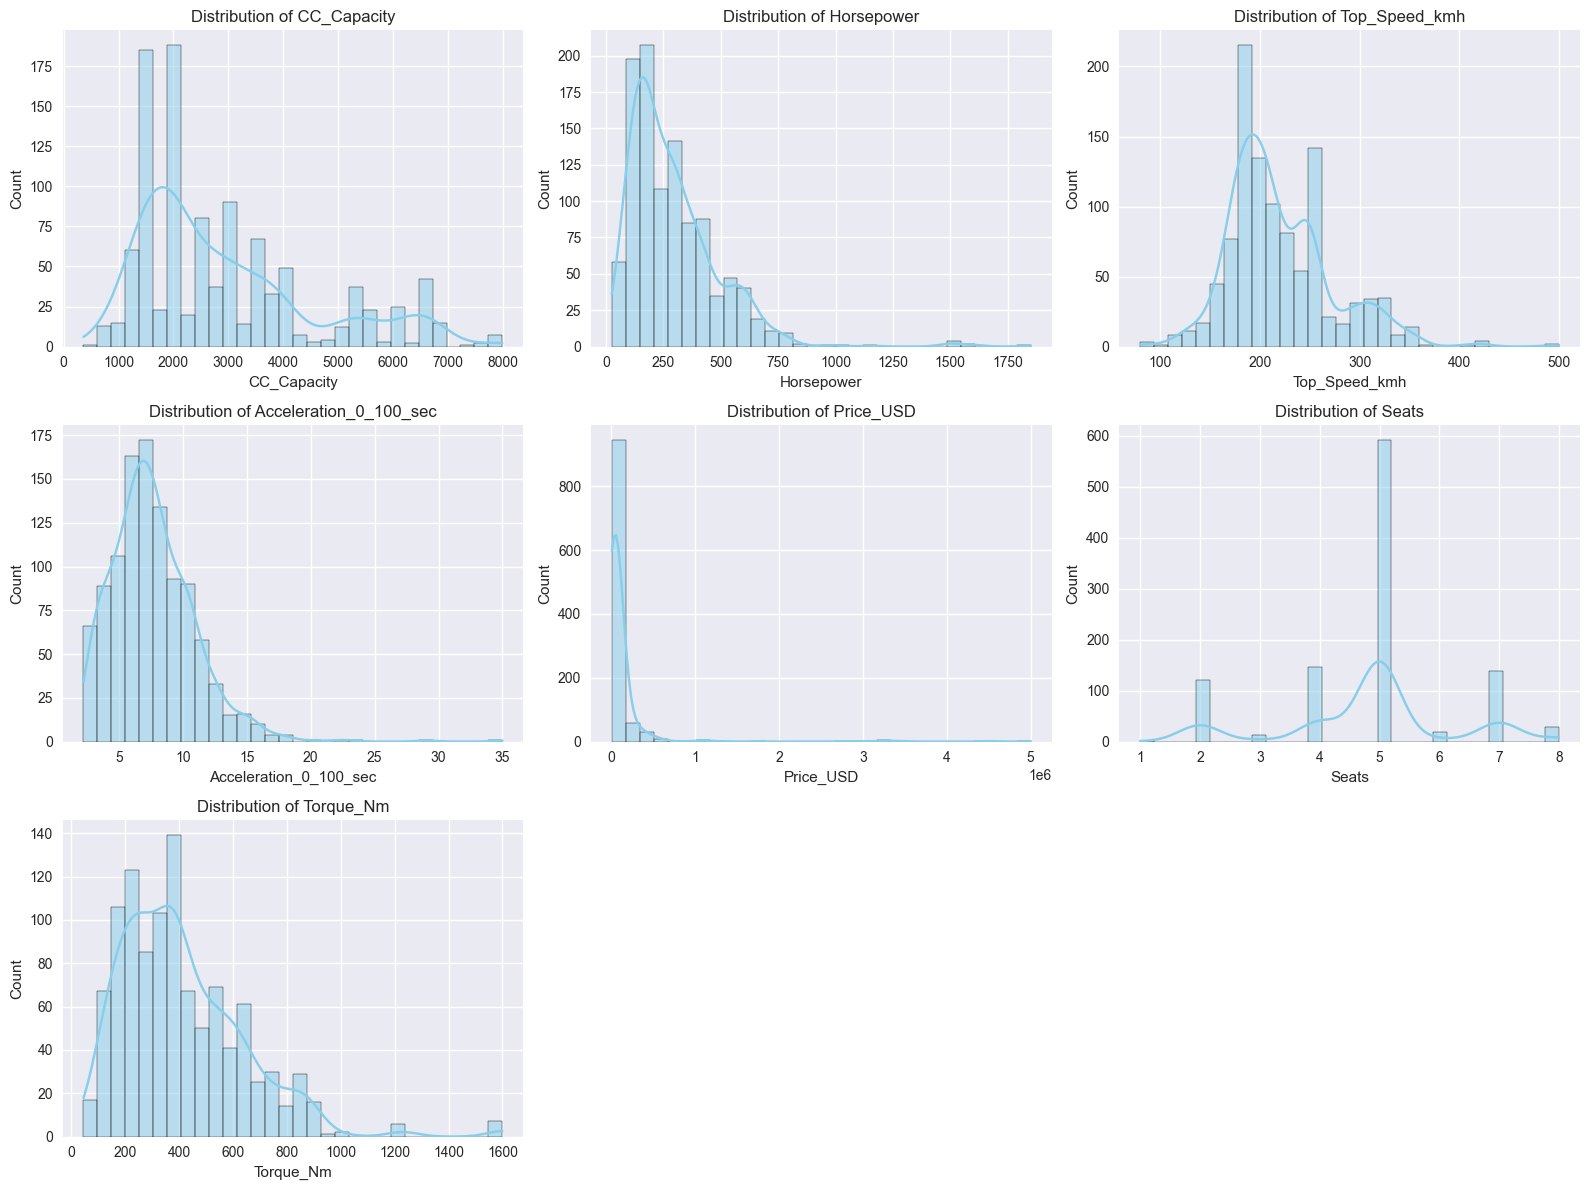

In [17]:
#  Distribution of Numeric Variables
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['CC_Capacity', 'Horsepower', 'Top_Speed_kmh', 
                'Acceleration_0_100_sec', 'Price_USD', 'Seats', 'Torque_Nm']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
